In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('community_welcomeness_records.csv')
df.describe()

,Name,Package URL,Github,ecosystem,goodFirstIssue
count,3685,3674,3686,3686,3686
unique,3651,3299,3449,4,2
top,redis,https://github.com/aws/aws-sdk-ruby,https://github.com/Azure/azure-sdk-for-python,maven,False
freq,3,229,72,1000,2830


In [18]:
df.groupby('ecosystem').describe()

Name                          Package URL          
          count unique          top freq       count unique   
ecosystem                                                     
maven      1000   1000  junit:junit    1         999    892  \
npm         985    985        chalk    1         986    986   
pypi        828    828        boto3    1         828    828   
rubygems    872    872      bundler    1         861    595   

                                                    Github          
                                           top freq  count unique   
ecosystem                                                           
maven                       http://webjars.org   17   1000   1000  \
npm        https://www.npmjs.com/package/chalk    1    986    878   
pypi           https://pypi.org/project/boto3/    1    828    720   
rubygems   https://github.com/aws/aws-sdk-ruby  229    872    857   

                                                              goodFirstIssue   
                                                     top freq          count   
ecosystem                                                                      
maven               https://github.com/junit-team/junit4    1           1000  \
npm                       https://github.com/babel/babel   25            986   
pypi       https://github.com/Azure/azure-sdk-for-python   72            828   
rubygems            https://github.com/kaminari/kaminari    4            872   

                              
          unique    top freq  
ecosystem                     
maven          2  False  783  
npm            2  False  756  
pypi           2  False  530  
rubygems       2  False  761

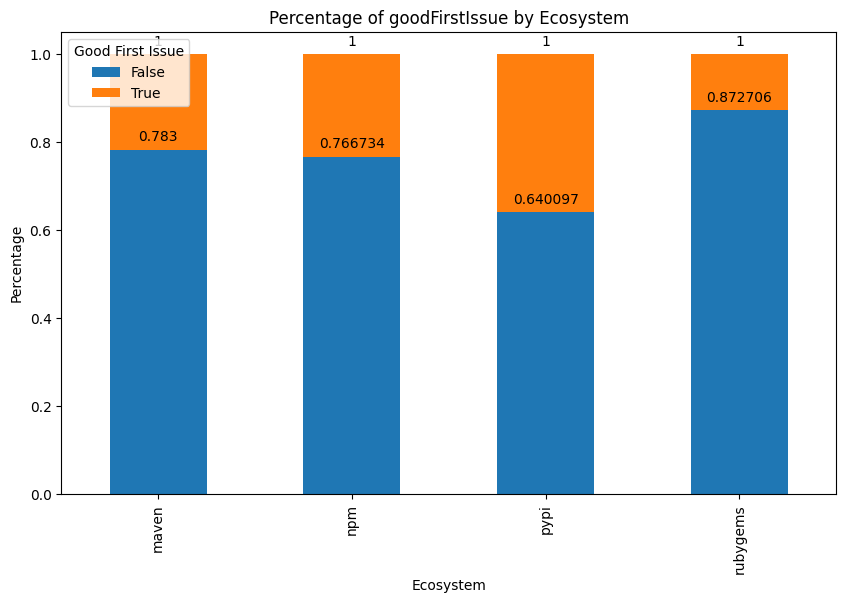

In [19]:

ecosystem_grouped = df.groupby('ecosystem')['goodFirstIssue'].value_counts(normalize=True).unstack().fillna(0)

ax = ecosystem_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of goodFirstIssue by Ecosystem')
plt.xlabel('Ecosystem')
plt.ylabel('Percentage ')
plt.legend(title='Good First Issue', loc='upper left', labels=['False', 'True'])

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=4)

plt.show()

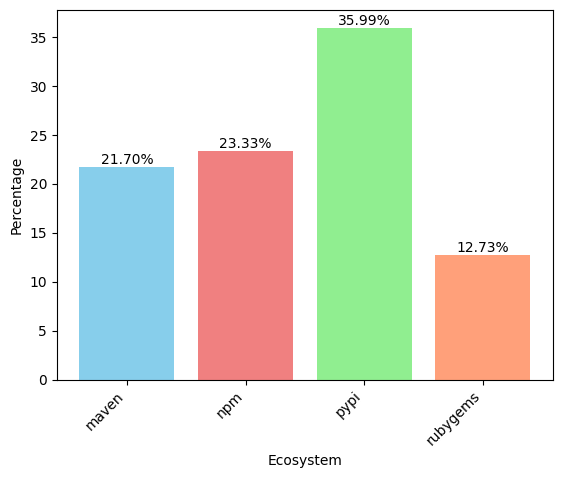

  ecosystem  goodFirstIssue
0     maven       21.700000
1       npm       23.326572
2      pypi       35.990338
3  rubygems       12.729358


In [20]:
# Group the data by 'ecosystem' and calculate the percentage of 'goodFirstIssue' values equal to True for each group
percentage_by_ecosystem = (df.groupby('ecosystem')['goodFirstIssue'].mean() * 100).reset_index()

# Create a bar plot
# plt.figure(figsize=(12, 6))
plt.bar(percentage_by_ecosystem['ecosystem'], percentage_by_ecosystem['goodFirstIssue'], color= ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
# plt.title('Percentage of Repositories in Ecosystem with GFI label')
plt.xlabel('Ecosystem')
plt.ylabel('Percentage of Repositories Featuring GFI Label')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add labels on top of the bars
for index, value in enumerate(percentage_by_ecosystem['goodFirstIssue']):
    plt.text(index, value, f"{value:.2f}%", ha='center', va='bottom')

plt.show()
print(percentage_by_ecosystem)